In [53]:
%run STAGE0_IMPORT_LIBS.ipynb

In [54]:
#data=active_smiles_df+inactive_smiles_df
cwd = os.getcwd()
parent_dir = os.path.abspath(os.path.join(cwd, os.pardir))
active_data_df=pd.read_csv(parent_dir+'\\0_skdata\chemical_names_pubchem_active.csv')
active_data_df['PubChem_ID'] = active_data_df['PubChem_ID'].astype(str)
inactive_data_df=pd.read_csv(parent_dir+'\\0_skdata\inactive_dude_db_top4.csv')
data = pd.concat([active_data_df, inactive_data_df])
data=data.reset_index(drop=True)
data['data_index'] = data.index

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


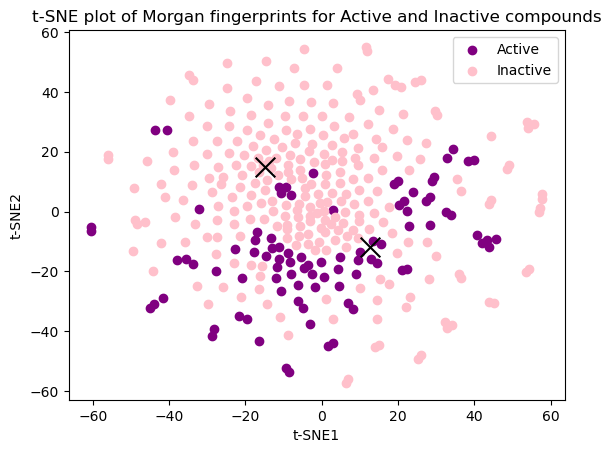

In [62]:

#selected_cols=['activity', 'SMILES','Chemical_Name', 'PubChem_ID']
#data = pd.concat([active_smiles_df[selected_cols], inactive_smiles_df[selected_cols]])
#data
nBitsK=4096

data_fp=[]
active_molecules = [AllChem.MolFromSmiles(smiles) for smiles in data[data['activity'] == 1]['SMILES']]
active_fingerprints = [AllChem.GetMorganFingerprintAsBitVect(mol, 6, nBits=nBitsK) for mol in active_molecules]
active_fingerprints_array = []
for fp in active_fingerprints:  
    arr = np.zeros((1,))
    AllChem.DataStructs.ConvertToNumpyArray(fp, arr)
    active_fingerprints_array.append(arr)

inactive_molecules = [AllChem.MolFromSmiles(smiles) for smiles in data[data['activity'] == 0]['SMILES']]
inactive_fingerprints = [AllChem.GetMorganFingerprintAsBitVect(mol, 4, nBits=nBitsK) for mol in inactive_molecules]
inactive_fingerprints_array = []
for fp in inactive_fingerprints:
    arr = np.zeros((1,))
    AllChem.DataStructs.ConvertToNumpyArray(fp, arr)
    inactive_fingerprints_array.append(arr)

# Combine active and inactive fingerprints
fingerprints_array = active_fingerprints_array + inactive_fingerprints_array
data_fp = pd.DataFrame(fingerprints_array)

# Perform t-SNE to reduce dimensionality
tsne = TSNE(n_components=2, random_state=1)
reduced_data = tsne.fit_transform(data_fp)

# Perform K-means clustering
kmeans = KMeans(n_clusters=2)
kmeans.fit(reduced_data)

# Plot scatter plot of reduced data with cluster labels
plt.scatter(reduced_data[:len(active_fingerprints_array), 0], reduced_data[:len(active_fingerprints_array), 1],color='purple', label='Active')
plt.scatter(reduced_data[len(active_fingerprints_array):, 0], reduced_data[len(active_fingerprints_array):, 1],color='pink', label='Inactive')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black', marker='x', s=200)
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.title('t-SNE plot of Morgan fingerprints for Active and Inactive compounds')
plt.legend()
plt.show()

